In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

In [2]:
path_to_mask_data = "../task_1_femur_tibia_mask.nii.gz"
path_to_data = "../data/3702_left_knee.nii.gz"

In [3]:
mask_vol = nib.load(path_to_data)
mask_vol

In [4]:
print(mask_vol.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 216   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int32
bitpix          : 32
slice_start     : 0
pixdim          : [1.       0.869141 0.869141 2.       0.       0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 222.5
qoffset_y       : 222.5
qoffset_z       : -900.5
s

In [5]:
img_array = mask_vol.get_fdata() # get image array data

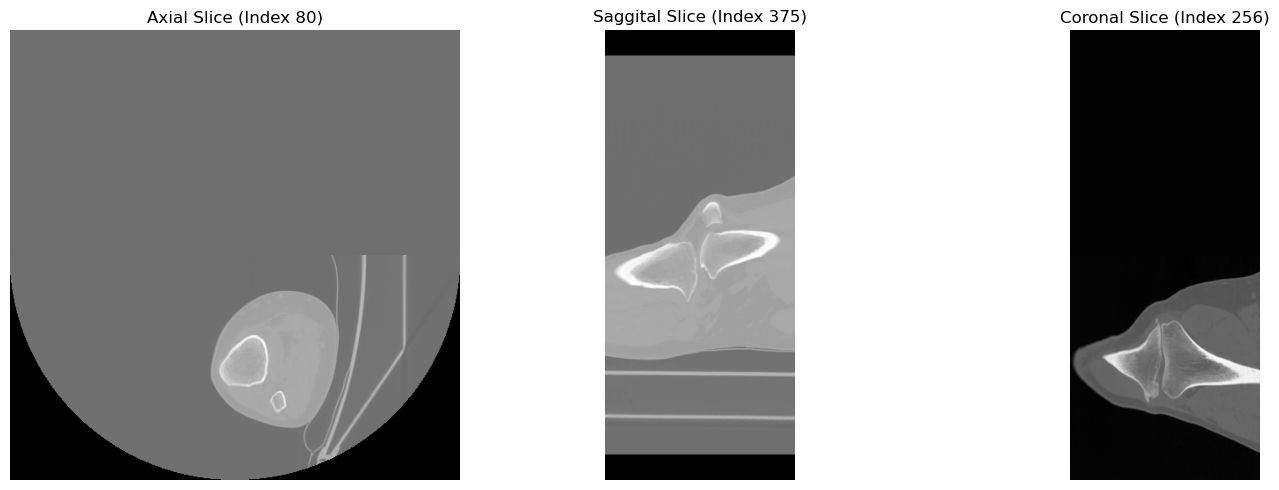

In [6]:
def plot_slices(data):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Axial slice 
    axes[0].imshow(data[:, :, 80], cmap='gray')
    axes[0].set_title('Axial Slice (Index 80)')
    axes[0].axis('off')

    # Coronal slice
    axes[1].imshow(data[375, :, :], cmap='gray')
    axes[1].set_title('Saggital Slice (Index 375)')
    axes[1].axis('off')
    # Sagittal slice
    axes[2].imshow(data[:, 256, :], cmap='gray')
    axes[2].set_title('Coronal Slice (Index 256)')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

plot_slices(img_array)


In [7]:
import torch
print(torch.__version__)


2.5.1


In [160]:
import torchvision.models as models
model_2d = models.densenet121(pretrained=True)

In [161]:
print(model_2d)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [141]:
# Loop over the layers in 'features'
for name, module in model_2d.features.named_children():
    print(f'Layer name: {name}')
    

Layer name: conv0
Layer name: norm0
Layer name: relu0
Layer name: pool0
Layer name: denseblock1
Layer name: transition1
Layer name: denseblock2
Layer name: transition2
Layer name: denseblock3
Layer name: transition3
Layer name: denseblock4
Layer name: norm5


In [84]:
conv_1_layer = model_2d.features[0]
conv_1_layer

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [85]:
conv_1_layer.weight.shape

torch.Size([64, 3, 7, 7])

In [86]:
conv_1_layer = model_2d.features[0]
conv_1_layer

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [87]:
conv_1_layer.weight[0]

tensor([[[ 0.0783,  0.1495,  0.1661,  0.1663,  0.1768,  0.1659,  0.1410],
         [ 0.1755,  0.2441,  0.2500,  0.2750,  0.2745,  0.2524,  0.2220],
         [ 0.1233,  0.1644,  0.1492,  0.1632,  0.1630,  0.1619,  0.1406],
         [ 0.0167,  0.0335,  0.0296,  0.0223,  0.0155,  0.0195,  0.0243],
         [-0.1046, -0.1207, -0.1197, -0.1190, -0.1136, -0.1118, -0.1165],
         [-0.1475, -0.1866, -0.1827, -0.2032, -0.2169, -0.2021, -0.1830],
         [-0.2073, -0.2712, -0.2816, -0.3017, -0.2871, -0.2488, -0.2261]],

        [[ 0.1642,  0.2481,  0.2654,  0.2681,  0.2736,  0.2569,  0.2248],
         [ 0.2423,  0.3216,  0.3235,  0.3517,  0.3457,  0.3181,  0.2813],
         [ 0.1582,  0.2025,  0.1836,  0.1880,  0.1948,  0.1897,  0.1696],
         [ 0.0222,  0.0198,  0.0045,  0.0020, -0.0030, -0.0054,  0.0025],
         [-0.1255, -0.1807, -0.1896, -0.1871, -0.1760, -0.1762, -0.1742],
         [-0.1818, -0.2625, -0.2608, -0.2847, -0.2975, -0.2760, -0.2420],
         [-0.2401, -0.3379, -0.3686,

In [88]:
weight3d = conv_1_layer.weight.unsqueeze(2)
weight3d.shape

torch.Size([64, 3, 1, 7, 7])

In [89]:
weight3d = weight3d.repeat(1, 1, 3, 1, 1)
weight3d.shape

torch.Size([64, 3, 3, 7, 7])

In [90]:
conv_1_layer.weight[0]

tensor([[[ 0.0783,  0.1495,  0.1661,  0.1663,  0.1768,  0.1659,  0.1410],
         [ 0.1755,  0.2441,  0.2500,  0.2750,  0.2745,  0.2524,  0.2220],
         [ 0.1233,  0.1644,  0.1492,  0.1632,  0.1630,  0.1619,  0.1406],
         [ 0.0167,  0.0335,  0.0296,  0.0223,  0.0155,  0.0195,  0.0243],
         [-0.1046, -0.1207, -0.1197, -0.1190, -0.1136, -0.1118, -0.1165],
         [-0.1475, -0.1866, -0.1827, -0.2032, -0.2169, -0.2021, -0.1830],
         [-0.2073, -0.2712, -0.2816, -0.3017, -0.2871, -0.2488, -0.2261]],

        [[ 0.1642,  0.2481,  0.2654,  0.2681,  0.2736,  0.2569,  0.2248],
         [ 0.2423,  0.3216,  0.3235,  0.3517,  0.3457,  0.3181,  0.2813],
         [ 0.1582,  0.2025,  0.1836,  0.1880,  0.1948,  0.1897,  0.1696],
         [ 0.0222,  0.0198,  0.0045,  0.0020, -0.0030, -0.0054,  0.0025],
         [-0.1255, -0.1807, -0.1896, -0.1871, -0.1760, -0.1762, -0.1742],
         [-0.1818, -0.2625, -0.2608, -0.2847, -0.2975, -0.2760, -0.2420],
         [-0.2401, -0.3379, -0.3686,

In [91]:
weight3d[0]

tensor([[[[ 0.0783,  0.1495,  0.1661,  0.1663,  0.1768,  0.1659,  0.1410],
          [ 0.1755,  0.2441,  0.2500,  0.2750,  0.2745,  0.2524,  0.2220],
          [ 0.1233,  0.1644,  0.1492,  0.1632,  0.1630,  0.1619,  0.1406],
          [ 0.0167,  0.0335,  0.0296,  0.0223,  0.0155,  0.0195,  0.0243],
          [-0.1046, -0.1207, -0.1197, -0.1190, -0.1136, -0.1118, -0.1165],
          [-0.1475, -0.1866, -0.1827, -0.2032, -0.2169, -0.2021, -0.1830],
          [-0.2073, -0.2712, -0.2816, -0.3017, -0.2871, -0.2488, -0.2261]],

         [[ 0.0783,  0.1495,  0.1661,  0.1663,  0.1768,  0.1659,  0.1410],
          [ 0.1755,  0.2441,  0.2500,  0.2750,  0.2745,  0.2524,  0.2220],
          [ 0.1233,  0.1644,  0.1492,  0.1632,  0.1630,  0.1619,  0.1406],
          [ 0.0167,  0.0335,  0.0296,  0.0223,  0.0155,  0.0195,  0.0243],
          [-0.1046, -0.1207, -0.1197, -0.1190, -0.1136, -0.1118, -0.1165],
          [-0.1475, -0.1866, -0.1827, -0.2032, -0.2169, -0.2021, -0.1830],
          [-0.2073, -0.

In [92]:
weight3d = weight3d/3

In [93]:
weight3d[0]

tensor([[[[ 0.0261,  0.0498,  0.0554,  0.0554,  0.0589,  0.0553,  0.0470],
          [ 0.0585,  0.0814,  0.0833,  0.0917,  0.0915,  0.0841,  0.0740],
          [ 0.0411,  0.0548,  0.0497,  0.0544,  0.0543,  0.0540,  0.0469],
          [ 0.0056,  0.0112,  0.0099,  0.0074,  0.0052,  0.0065,  0.0081],
          [-0.0349, -0.0402, -0.0399, -0.0397, -0.0379, -0.0373, -0.0388],
          [-0.0492, -0.0622, -0.0609, -0.0677, -0.0723, -0.0674, -0.0610],
          [-0.0691, -0.0904, -0.0939, -0.1006, -0.0957, -0.0829, -0.0754]],

         [[ 0.0261,  0.0498,  0.0554,  0.0554,  0.0589,  0.0553,  0.0470],
          [ 0.0585,  0.0814,  0.0833,  0.0917,  0.0915,  0.0841,  0.0740],
          [ 0.0411,  0.0548,  0.0497,  0.0544,  0.0543,  0.0540,  0.0469],
          [ 0.0056,  0.0112,  0.0099,  0.0074,  0.0052,  0.0065,  0.0081],
          [-0.0349, -0.0402, -0.0399, -0.0397, -0.0379, -0.0373, -0.0388],
          [-0.0492, -0.0622, -0.0609, -0.0677, -0.0723, -0.0674, -0.0610],
          [-0.0691, -0.

In [162]:
import torch.nn as nn

def inflate_conv2d(conv2d, depth):
    conv3d = nn.Conv3d(
    in_channels=conv2d.in_channels,
    out_channels=conv2d.out_channels,
    kernel_size=(depth, *conv2d.kernel_size),
    stride=(1, *conv2d.stride),
    padding=(depth // 2, *conv2d.padding),
    dilation=(1, *conv2d.dilation),
    bias=conv2d.bias is not None
    )
        
    
    with torch.no_grad():
        # Modify the weights without tracking gradients
        weight2d = conv2d.weight.data  # (out, in, h, w)
        weight3d = weight2d.unsqueeze(2).repeat(1, 1, depth, 1, 1) / depth  # (out, in, d, h, w)
        conv3d.weight.copy_(weight3d)
        if conv2d.bias is not None:
            conv3d.bias.copy_(conv2d.bias.data)
            
    return conv3d

In [163]:
def inflate_batchnorm2d_to_3d(batchnorm2d):
    return nn.BatchNorm3d(
        num_features=batchnorm2d.num_features,  # Number of channels
        eps=batchnorm2d.eps,                    # Epsilon for numerical stability
        momentum=batchnorm2d.momentum,          # Momentum for running statistics
        affine=batchnorm2d.affine,              # Whether it has learnable parameters
        track_running_stats=batchnorm2d.track_running_stats  # Whether to track running stats
    )

In [164]:
def inflate_maxpool2d_to_3d(pool2d_layer):
    return nn.MaxPool3d(kernel_size=(1, pool2d_layer.kernel_size, pool2d_layer.kernel_size),
                        stride=(1, pool2d_layer.stride, pool2d_layer.stride),
                        padding=(0, pool2d_layer.padding, pool2d_layer.padding),
                        dilation=pool2d_layer.dilation, ceil_mode=pool2d_layer.ceil_mode)

In [165]:
# Function to inflate AvgPool2D to AvgPool3D
def inflate_avgpool2d_to_3d(pool2d_layer):
    # Create the AvgPool3D layer with the inflated parameters
    return nn.AvgPool3d(kernel_size=(1, pool2d_layer.kernel_size, pool2d_layer.kernel_size), 
                        stride=(1, pool2d_layer.stride, pool2d_layer.stride),
                        padding=(0, pool2d_layer.padding, pool2d_layer.padding))

In [166]:
inflate_conv = inflate_conv2d(model_2d.features[0], depth=3)
inflate_conv

Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)

In [167]:
inflate_batch_norm2d = inflate_batchnorm2d_to_3d(model_2d.features[1])
inflate_batch_norm2d, model_2d.features[1]


(BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
 BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True))

In [168]:
inflate_max_pool_2d = inflate_maxpool2d_to_3d(model_2d.features[3])
model_2d.features[3], inflate_max_pool_2d

(MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False),
 MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1), dilation=1, ceil_mode=False))

In [169]:
model_2d.features

Sequential(
  (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu0): ReLU(inplace=True)
  (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (denseblock1): _DenseBlock(
    (denselayer1): _DenseLayer(
      (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu2): ReLU(inplace=True)
      (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (denselayer2): _DenseLayer(
      (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu1): ReLU(inplace=True)
      (conv1): Conv2d(96, 128, ke

In [170]:
model_2d.features.conv0 = inflate_conv2d(model_2d.features.conv0, depth=3)
model_2d.features.norm0 = inflate_batchnorm2d_to_3d(model_2d.features.norm0)

In [171]:
model_2d.features.norm5 = inflate_batchnorm2d_to_3d(model_2d.features.norm5)

In [172]:
model_2d.features.pool0 = inflate_maxpool2d_to_3d(model_2d.features.pool0)

In [173]:
for block_name in ['denseblock1', 'denseblock2', 'denseblock3', 'denseblock4']:
    block = getattr(model_2d.features, block_name)
    # print(block)
    for layer_name, layer in block.named_children():
        # print(layer_name, layer)
        if hasattr(layer, 'conv1'):
            # print(layer.conv1)
            layer.conv1 = inflate_conv2d(layer.conv1, depth = 3)
            
        if hasattr(layer, 'conv2'):
            layer.conv2 = inflate_conv2d(layer.conv2, depth=3)
            
        if hasattr(layer, 'norm1'):
            layer.norm1 = inflate_batchnorm2d_to_3d(layer.norm1)
            
        if hasattr(layer, 'norm2'):
            # Inflate BatchNorm2d to BatchNorm3d while keeping learnable parameters
            layer.norm2 = inflate_batchnorm2d_to_3d(layer.norm2)


In [174]:
# Replace convs in transition layers
for trans_name in ['transition1', 'transition2', 'transition3']:
    trans = getattr(model_2d.features, trans_name)
    if hasattr(trans, 'conv'):
        # print(trans)
        trans.conv = inflate_conv2d(trans.conv, depth=3)
        print(trans.conv)
        
    if hasattr(trans, 'norm'):
        trans.norm = inflate_batchnorm2d_to_3d(trans.norm)
        print(trans.norm)
        
    if hasattr(trans, 'pool'):
        # Inflate AvgPool2D to AvgPool3D
        trans.pool = inflate_avgpool2d_to_3d(trans.pool)
        print(trans.pool)

        


Conv3d(256, 128, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
AvgPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=(0, 0, 0))
Conv3d(512, 256, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
AvgPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=(0, 0, 0))
Conv3d(1024, 512, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
BatchNorm3d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
AvgPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=(0, 0, 0))


In [155]:
print(model_2d)

DenseNet(
  (features): Sequential(
    (conv0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (norm0): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool3d(kernel_size=(1, 3, 3), stride=(1, 2, 2), padding=(0, 1, 1), dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv3d(64, 128, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
        (norm2): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm3d(96, eps=1e-05,

In [156]:
i = 0
for name, module in model_2d.named_modules():
    if isinstance(module, nn.BatchNorm2d):
        i += 1
        print(module)
print(i)


0


In [157]:
i = 0
for name, module in model_2d.named_modules():
    if isinstance(module, nn.Conv3d):
        i += 1
        print(module)
print(i)


Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
Conv3d(64, 128, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(96, 128, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(128, 128, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(160, 128, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(192, 128, kernel_size=(3, 1, 1), stride=(1, 1, 1), padding=(1, 0, 0), bias=False)
Conv3d(128, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
Conv3d(224, 128, kernel_size=(3

In [126]:
mask_vol = nib.load(path_to_mask_data)
ct_vol = nib.load(path_to_data)

In [127]:
mask_img_array = mask_vol.get_fdata()
ct_img_array = ct_vol.get_fdata()

In [128]:
ct_img_array.shape

(512, 512, 216)

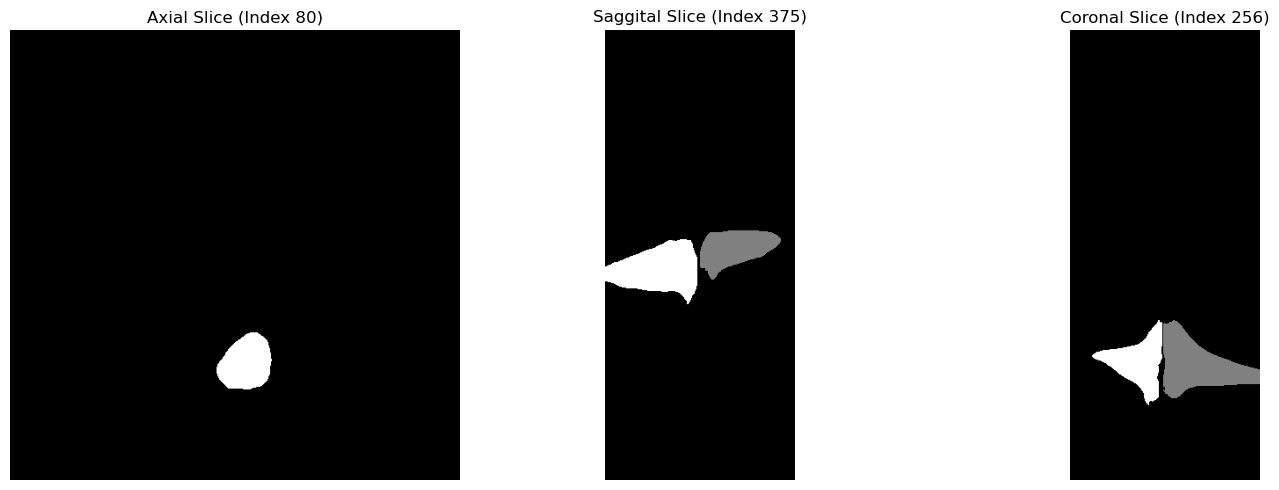

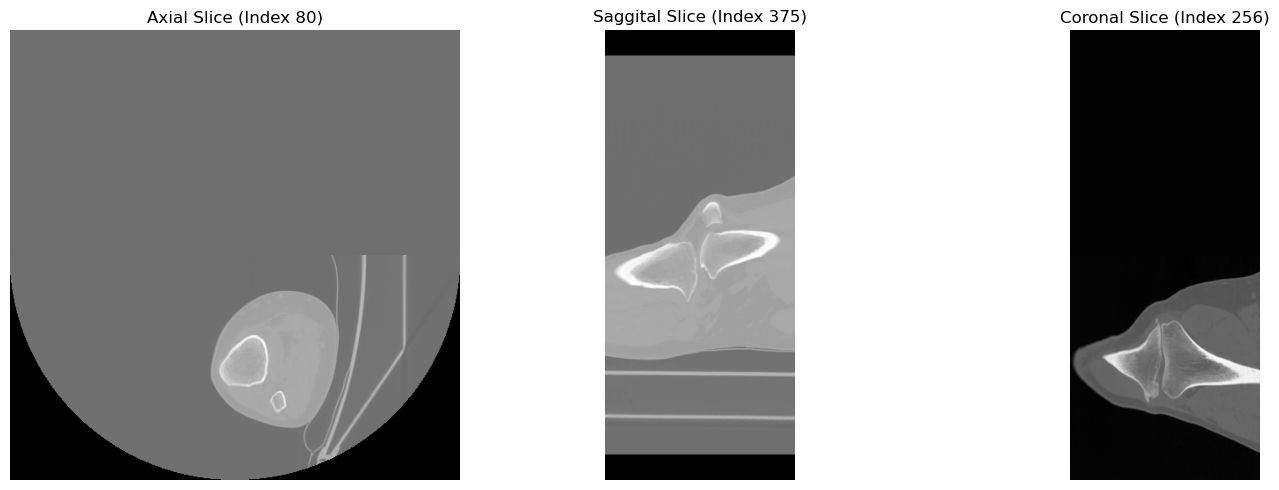

In [129]:
plot_slices(mask_img_array)
plot_slices(ct_img_array)

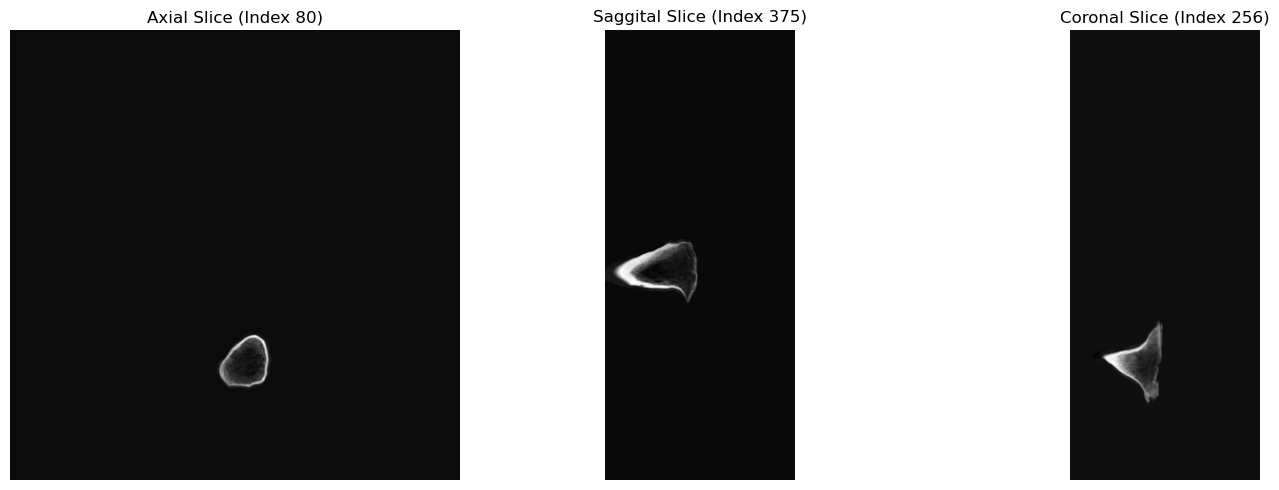

In [212]:
tibia_volume = np.where(mask_img_array == 2, ct_img_array, 0)
plot_slices(tibia_volume)


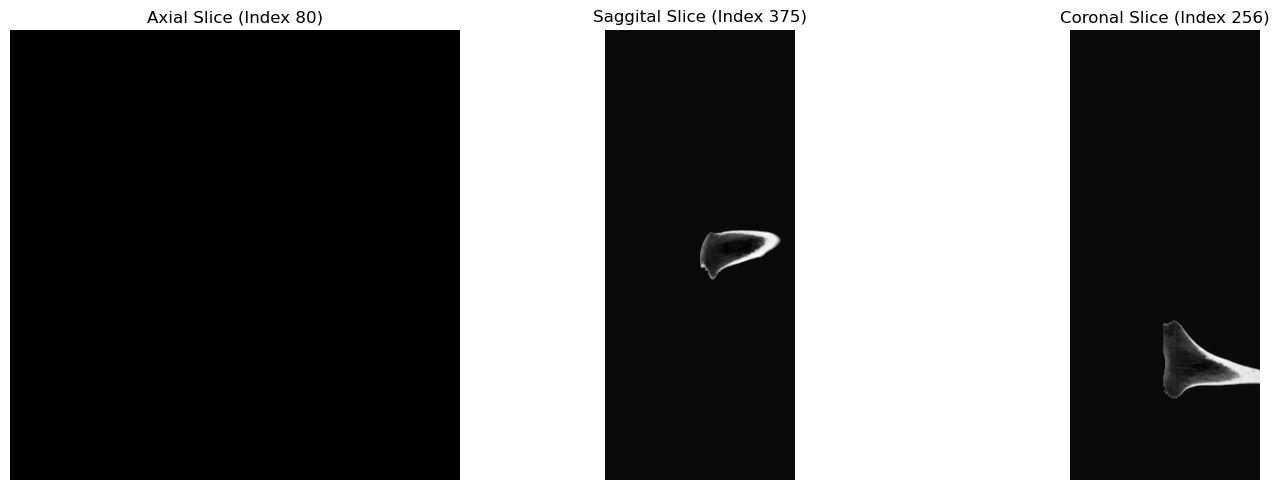

In [213]:
femur_volume = np.where(mask_img_array == 1, ct_img_array, 0)
plot_slices(femur_volume)


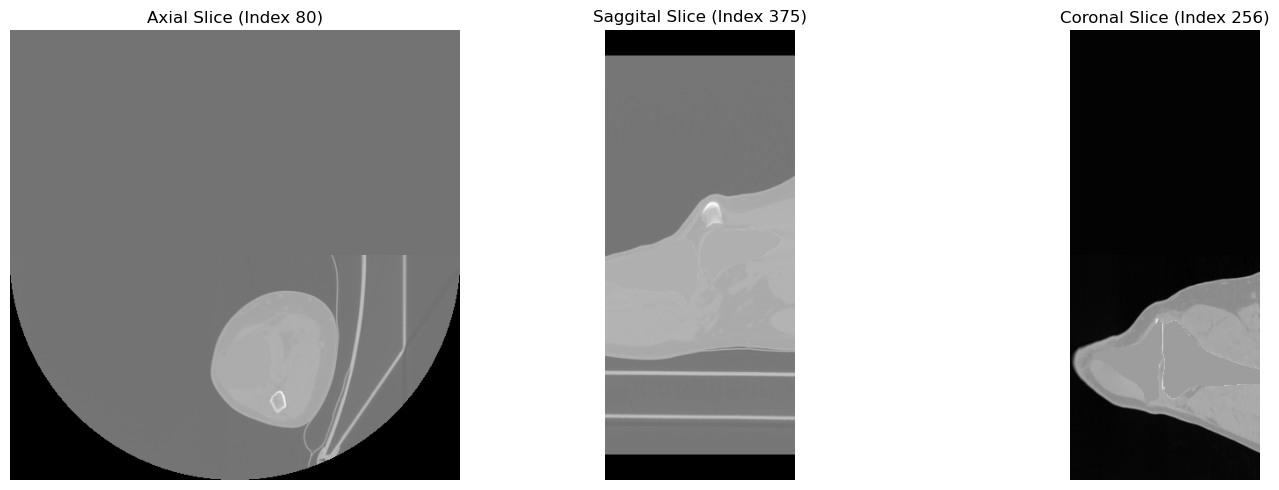

In [214]:
background_volume = np.where(mask_img_array == 0, ct_img_array, 0)
plot_slices(background_volume)

In [215]:
ct_img_array.max(),ct_img_array.min()

(1769.0, -3024.0)

In [216]:
tibia_volume = torch.tensor(tibia_volume)
femur_volume = torch.tensor(femur_volume)
background_volume = torch.tensor(background_volume)
tibia_volume.shape

torch.Size([512, 512, 216])

In [217]:
tibia_volume = (tibia_volume - ct_img_array.min())/ (ct_img_array.max() - ct_img_array.min())
femur_volume = (femur_volume - ct_img_array.min())/ (ct_img_array.max() - ct_img_array.min())
background_volume = (background_volume - ct_img_array.min())/ (ct_img_array.max() - ct_img_array.min())

In [210]:
tibia_volume.max(), tibia_volume.min(), femur_volume.max(), femur_volume.min(), background_volume.max(), background_volume.min()

(tensor(1., dtype=torch.float64),
 tensor(0.6046, dtype=torch.float64),
 0.9860212810348424,
 0.6127686209054871,
 0.9843521802628834,
 0.0)

In [218]:
tibia_volume_2 = tibia_volume.permute(2, 0, 1)  # Shape will now be (216, 512, 512)

# Replicate the single channel along the 3 channel axis to make it (3, 216, 512, 512)
tibia_volume_2 = tibia_volume_2.unsqueeze(0).repeat(3, 1, 1, 1)  # Shape will now be (3, 216, 512, 512)

# Add batch dimension (batch_size = 1 in this case)
tibia_volume_2 = tibia_volume_2.unsqueeze(0)  # Shape will now be (1, 3, 216, 512, 512)

# Now, ct_volume_batch can be passed as input to the model expecting 3 channels and batch dimension
print(tibia_volume_2.shape)  # Output shape will be torch.Size([1, 3, 216, 512, 512])

torch.Size([1, 3, 216, 512, 512])


In [135]:
import torch.nn.functional as F

# Resize the volume to a smaller size (e.g., 256x256)
new_height = 256
new_width = 256
tibia_volume_resized = F.interpolate(tibia_volume_2, size=(216, new_height, new_width), mode='trilinear', align_corners=True)

print(tibia_volume_resized.shape)  # Check the resized shape


torch.Size([1, 3, 216, 256, 256])


In [220]:
dummy_data_1 = torch.randn(1, 3, 216, 200, 200)
dummy_data_2 = torch.randn(1, 3, 216, 200, 200)

dummy_data_3 = torch.randn(1, 3, 216, 200, 200)



In [237]:
def extract_feature_map(data):

    # Dictionary to store layer names and their corresponding outputs
    layer_outputs = {}

    # Define a hook function to store the feature map along with layer name
    def hook_fn(layer_name):
        def fn(module, input, output):
            layer_outputs[layer_name] = output
        return fn
        
    # Register hooks for the specific layers
    handle_1 = model_2d.features.denseblock4.denselayer16.conv2.register_forward_hook(hook_fn("denseblock4.layer16.conv2"))
    handle_2 = model_2d.features.denseblock4.denselayer15.conv2.register_forward_hook(hook_fn("denseblock4.layer15.conv2"))
    handle_3 = model_2d.features.denseblock4.denselayer14.conv2.register_forward_hook(hook_fn("denseblock4.layer14.conv2"))


    model_2d.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Turn off gradient calculation (not needed during inference)
        last_conv =model_2d.features(data)  # Pass input through the model

    # Output is the feature map or classification result (depending on the model's final layers)
    # print(last_conv.shape)  # Print the output shape to see the result
    
    # Remove hooks after extracting the feature maps
    handle_1.remove()
    handle_2.remove()
    handle_3.remove()
    
    print("Extraction complete")

    return layer_outputs

In [238]:
tibia_extract = extract_feature_map(dummy_data_1)
femur_extract = extract_feature_map(dummy_data_2)
background_extract = extract_feature_map(dummy_data_3)

Extraction complete
Extraction complete
Extraction complete


In [231]:
out_2 = extract_feature_map(dummy_data_2)
out_2['denseblock4.layer14.conv2'].shape, out_2['denseblock4.layer15.conv2'].shape, out_2['denseblock4.layer16.conv2'].shape,

torch.Size([1, 1024, 216, 6, 6])


(torch.Size([1, 32, 216, 6, 6]),
 torch.Size([1, 32, 216, 6, 6]),
 torch.Size([1, 32, 216, 6, 6]))

In [224]:
import torch.nn.functional as F

def apply_global_avg_pooling_and_extract_feature_vector(feature_extract):
    gap_output_1 = F.adaptive_avg_pool3d( feature_extract['denseblock4.layer14.conv2'], (1, 1, 1))  
    gap_output_1 = gap_output_1.squeeze()  # Shape will be (32, 1, 1), then remove the 1s
    gap_output_1 = gap_output_1.view(-1)  # Final shape will be (32,)
    
    gap_output_2 = F.adaptive_avg_pool3d( feature_extract['denseblock4.layer15.conv2'], (1, 1, 1))  
    gap_output_2 = gap_output_2.squeeze()  # Shape will be (32, 1, 1), then remove the 1s
    gap_output_2 = gap_output_2.view(-1)  # Final shape will be (32,)

    gap_output_3 = F.adaptive_avg_pool3d( feature_extract['denseblock4.layer16.conv2'], (1, 1, 1))  
    gap_output_3 = gap_output_3.squeeze()  # Shape will be (32, 1, 1), then remove the 1s
    gap_output_3 = gap_output_3.view(-1)  # Final shape will be (32,)
    
    return gap_output_1, gap_output_2, gap_output_3

In [241]:
tibia_extract_fifth_last, tibia_extract_third_last, tibia_extract_last = apply_global_avg_pooling_and_extract_feature_vector(tibia_extract)
tibia_extract_fifth_last.shape, tibia_extract_third_last.shape, tibia_extract_last.shape

(torch.Size([32]), torch.Size([32]), torch.Size([32]))

In [243]:
femur_extract_fifth_last, femur_extract_third_last, femur_extract_last = apply_global_avg_pooling_and_extract_feature_vector(femur_extract)
femur_extract_fifth_last.shape, femur_extract_third_last.shape, femur_extract_last.shape

(torch.Size([32]), torch.Size([32]), torch.Size([32]))

In [244]:
background_extract_fifth_last, background_extract_third_last, background_extract_last = apply_global_avg_pooling_and_extract_feature_vector(background_extract)
background_extract_fifth_last.shape, background_extract_third_last.shape, background_extract_last.shape

(torch.Size([32]), torch.Size([32]), torch.Size([32]))

In [245]:
# Function to compute cosine similarity
def cosine_similarity(v1, v2):
    return F.cosine_similarity(v1.view(1, -1), v2.view(1, -1))


In [246]:
similarity_tibia_last_femur_last = cosine_similarity(tibia_extract_last, femur_extract_last)
similarity_tibia_last_femur_3rd_last = cosine_similarity(tibia_extract_last, femur_extract_third_last)
similarity_tibia_last_femur_5th_last = cosine_similarity(tibia_extract_last, femur_extract_fifth_last)

similarity_tibia_3rd_last_femur_last = cosine_similarity(tibia_extract_third_last,femur_extract_last)
similarity_tibia_3rd_last_femur_3rd_last = cosine_similarity(tibia_extract_third_last, femur_extract_third_last)
similarity_tibia_3rd_last_femur_5th_last = cosine_similarity(tibia_extract_third_last, femur_extract_fifth_last)

similarity_tibia_5th_last_femur_last = cosine_similarity(tibia_extract_fifth_last, femur_extract_last)
similarity_tibia_5th_last_femur_3rd_last = cosine_similarity(tibia_extract_fifth_last, femur_extract_third_last)
similarity_tibia_5th_last_femur_5th_last = cosine_similarity(tibia_extract_fifth_last, femur_extract_fifth_last)


similarity_tibia_last_background_last = cosine_similarity(tibia_extract_last, background_extract_last)
similarity_tibia_last_background_3rd_last = cosine_similarity(tibia_extract_last, background_extract_third_last)
similarity_tibia_last_background_5th_last = cosine_similarity(tibia_extract_last, background_extract_fifth_last)

similarity_tibia_3rd_last_background_last = cosine_similarity(tibia_extract_third_last, background_extract_last)
similarity_tibia_3rd_last_background_3rd_last = cosine_similarity(tibia_extract_third_last, background_extract_third_last)
similarity_tibia_3rd_last_background_5th_last = cosine_similarity(tibia_extract_third_last, background_extract_fifth_last)

similarity_tibia_5th_last_background_last = cosine_similarity(tibia_extract_fifth_last, background_extract_last)
similarity_tibia_5th_last_background_3rd_last =  cosine_similarity(tibia_extract_fifth_last, background_extract_third_last)
similarity_tibia_5th_last_background_5th_last =  cosine_similarity(tibia_extract_fifth_last, background_extract_fifth_last)


similarity_femur_last_background_last = cosine_similarity(femur_extract_last, background_extract_last)
similarity_femur_last_background_3rd_last = cosine_similarity(femur_extract_last, background_extract_third_last)
similarity_femur_last_background_5th_last = cosine_similarity(femur_extract_last, background_extract_fifth_last)

similarity_femur_3rd_last_background_last = cosine_similarity(femur_extract_third_last, background_extract_last)
similarity_femur_3rd_last_background_3rd_last = cosine_similarity(femur_extract_third_last, background_extract_third_last)
similarity_femur_3rd_last_background_5th_last = cosine_similarity(femur_extract_third_last, background_extract_fifth_last)

similarity_femur_5th_last_background_last = cosine_similarity(femur_extract_fifth_last, background_extract_last)
similarity_femur_5th_last_background_3rd_last = cosine_similarity(femur_extract_fifth_last, background_extract_third_last)
similarity_femur_5th_last_background_5th_last = cosine_similarity(femur_extract_fifth_last, background_extract_fifth_last)


In [247]:
import pandas as pd

data = {
    # Tibia (last) vs Femur (last, third_last, fifth_last)
    "tibia(last)__femur": [
        similarity_tibia_last_femur_last,
        similarity_tibia_last_femur_3rd_last,
        similarity_tibia_last_femur_5th_last
    ],
    "tibia(third_last)__femur": [
        similarity_tibia_3rd_last_femur_last,
        similarity_tibia_3rd_last_femur_3rd_last,
        similarity_tibia_3rd_last_femur_5th_last
    ],
    "tibia(fifth_last)__femur": [
        similarity_tibia_5th_last_femur_last,
        similarity_tibia_5th_last_femur_3rd_last,
        similarity_tibia_5th_last_femur_5th_last
    ],

    # Tibia (last) vs Background (last, third_last, fifth_last)
    "tibia(last)__background": [
        similarity_tibia_last_background_last,
        similarity_tibia_last_background_3rd_last,
        similarity_tibia_last_background_5th_last
    ],
    "tibia(third_last)__background": [
        similarity_tibia_3rd_last_background_last,
        similarity_tibia_3rd_last_background_3rd_last,
        similarity_tibia_3rd_last_background_5th_last
    ],
    "tibia(fifth_last)__background": [
        similarity_tibia_5th_last_background_last,
        similarity_tibia_5th_last_background_3rd_last,
        similarity_tibia_5th_last_background_5th_last
    ],

    # Femur (last) vs Background (last, third_last, fifth_last)
    "femur(last)__background": [
        similarity_femur_last_background_last,
        similarity_femur_last_background_3rd_last,
        similarity_femur_last_background_5th_last
    ],
    "femur(third_last)__background": [
        similarity_femur_3rd_last_background_last,
        similarity_femur_3rd_last_background_3rd_last,
        similarity_femur_3rd_last_background_5th_last
    ],
    "femur(fifth_last)__background": [
        similarity_femur_5th_last_background_last,
        similarity_femur_5th_last_background_3rd_last,
        similarity_femur_5th_last_background_5th_last
    ],
}

df = pd.DataFrame(data)

# Save without index
df.to_csv("similarity_no_index.csv", index=False)

print(df)


  tibia(last)__femur tibia(third_last)__femur tibia(fifth_last)__femur  \
0   [tensor(1.0000)]         [tensor(0.4203)]         [tensor(0.2185)]   
1   [tensor(0.4190)]         [tensor(1.0000)]         [tensor(0.2119)]   
2   [tensor(0.2186)]         [tensor(0.2127)]         [tensor(1.0000)]   

  tibia(last)__background tibia(third_last)__background  \
0        [tensor(1.0000)]              [tensor(0.4205)]   
1        [tensor(0.4188)]              [tensor(1.0000)]   
2        [tensor(0.2202)]              [tensor(0.2143)]   

  tibia(fifth_last)__background femur(last)__background  \
0              [tensor(0.2154)]        [tensor(1.0000)]   
1              [tensor(0.2113)]        [tensor(0.4175)]   
2              [tensor(1.0000)]        [tensor(0.2206)]   

  femur(third_last)__background femur(fifth_last)__background  
0              [tensor(0.4179)]              [tensor(0.2158)]  
1              [tensor(1.0000)]              [tensor(0.2111)]  
2              [tensor(0.2134)]      